In [1]:
%load_ext autoreload
% autoreload 2

In [2]:
from SceneR2 import yolov3
from SceneR2.core import *
from SceneR2.yolov3 import VideoPipeline
from SceneR2.utils import get_frames
from matplotlib import patches
import warnings

warnings.simplefilter('ignore')

/home/sufiyan/Dropbox/MTP/Code_and_Notebook/Notebooks/SceneR2/yolov3/pipeline.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/sufiyan/anaconda3/envs/fastai/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sufiyan/anaconda3/envs/fastai/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sufiyan/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sufiyan/anaconda3/envs/fastai/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sufiyan/anaconda3/envs/fastai

In [3]:
video = get_frames("../data/Daimler/100_vids/videos/20170207_061253_Video.mp4")
video = np.stack([f for f in video])
video = np.moveaxis(video, 1, 3)

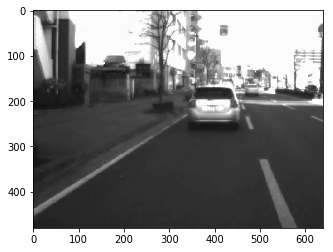

In [4]:
plt.imshow(video[0])

In [5]:
pip = VideoPipeline(batch_sz=8, img_size=416)

In [6]:
vid_path = pip.vid2vid("../data/Daimler/100_vids/videos/20170207_061253_Video.mp4", "../data/Daimler/100_vids/object_detection")

In [8]:
Video(vid_path)

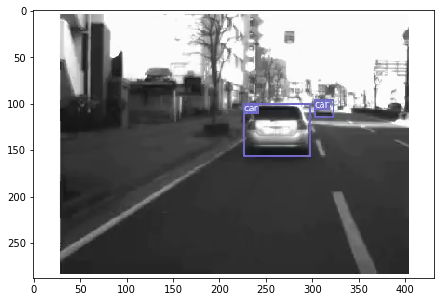

In [10]:
for f in imageio.get_reader(vid_path):
    plt.imshow(f)
    plt.tight_layout(pad=0)
    break

In [5]:
with open("../data/Daimler/100_vids/images/path_and_predictions.pkl", "rb") as f:
    source_path, img_detections = pickle.load(f)

In [6]:
detections = img_detections[0]

In [7]:
unique_labels = detections[:, -1].cpu().unique()

In [8]:
n_cls_preds = len(unique_labels)

In [9]:
cmap = plt.get_cmap('tab20b')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
import random
bbox_colors = random.sample(colors, n_cls_preds)

In [14]:
from PIL import Image
img = np.asarray(Image.open("../data/Daimler/100_vids/images/raw/20170207_061253_Video/0000.png"))

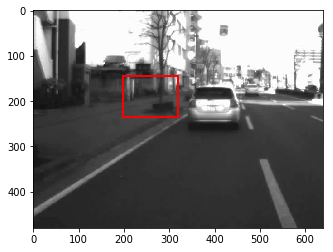

In [15]:
# img = video[0]
fig, ax  = plt.subplots(1)
ax.imshow(img)
p = patches.Rectangle((198,144), width=320-198, height=236-144, linewidth=2, facecolor='none', edgecolor='red')
ax.add_patch(p)